#**Simple Reflex Agent**

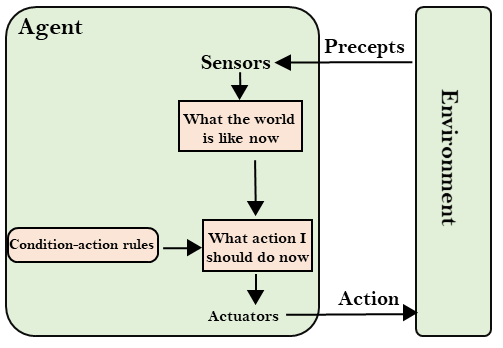

To create our agent, we need two functions: INTERPRET-INPUT function, which
generates an abstracted description of the current state from the percept and
the RULE-MATCH function, which returns the first rule in the set of rules that
matches the given state description.

In [ ]:
class Agent:
  d
  def act(self):




class Environment:
  def __init__(self):
    pass

  def get_percept():
    pass

  def clean_room(self):
    pass






#**Simple Reflex-Based Hand-Pulling Agent: Code1**

Imagine a robot or an automated hand safety system designed to detect the heat level of objects and prevent harm by retracting upon touching dangerously hot surfaces. This system uses a reflex agent to make immediate decisions based on perceptual input from the environment.

In [1]:
class Environment:
    def __init__(self, heat_level='High'):
        self.heat_level = heat_level

    def get_percept(self):
        """Return the heat level of the object as the percept."""
        return 'Hot' if self.heat_level == 'High' else 'Cool'


class SimpleReflexAgent:
    def __init__(self):
        pass

    def act(self, percept):
        """Determine action based on the percept (heat level)."""
        if percept == 'Hot':
            return 'Pull hand away, you touched the hot object'
        else:
            return 'You have not touched any hot object , No need to pull away'

def run_agent(agent, environment):
    # The agent reacts to the heat stimulus only once
    percept = environment.get_percept()
    action = agent.act(percept)
    print(f"Percept: {percept}, Action: {action}")


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment(heat_level='Low')  # Start with a cool object

# Run the agent in the environment (only once)
run_agent(agent, environment)



Percept: Cool, Action: You have not touched any hot object , No need to pull away


#Example # 2 (Vaccumm Cleaner)

In [ ]:


class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'


class SimpleReflexAgent:
    def __init__(self):
        pass

    def act(self, percept):
        if percept == 'Dirty':
            return 'Clean the room'
        else:
            return 'Room is clean'


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}")
        if percept == 'Dirty':
            environment.clean_room()


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


Step 1: Percept - Dirty, Action - Clean the room
Step 2: Percept - Clean, Action - Room is clean
Step 3: Percept - Clean, Action - Room is clean
Step 4: Percept - Clean, Action - Room is clean
Step 5: Percept - Clean, Action - Room is clean


In [ ]:
#another method using Inheritance

class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'

    def run_agent(self, agent, steps):
        """Simulates the environment interacting with the agent."""
        for step in range(steps):
            percept = self.get_percept()
            action = agent.act(percept)
            print(f"Step {step + 1}: Percept - {percept}, Action - {action}")
            if percept == 'Dirty':
                self.clean_room()

class Agent(Environment):  # Inheriting from Environment
    def __init__(self, state='Dirty'):
        super().__init__(state)  # Initialize environment state

    def act(self, percept):
        """Define the agent's action based on percept."""
        if percept == 'Dirty':
            return 'Clean the room'
        else:
            return 'Room is clean'

# Create an agent instance (inherits from Environment)
agent = Agent()

# Run the agent in the environment for 5 steps
agent.run_agent(agent, 5)


Step 1: Percept - Dirty, Action - Clean the room
Step 2: Percept - Clean, Action - Room is clean
Step 3: Percept - Clean, Action - Room is clean
Step 4: Percept - Clean, Action - Room is clean
Step 5: Percept - Clean, Action - Room is clean


#Example 3 Simple Reflex Agent Code Example #3 (2D Grid-Based Vacuum Cleaner Simulation: Smart Cleaning Robot)

In [ ]:
class SimpleReflexAgent:
    def __init__(self):
        self.position = 0  # Start at position 0 (top-left corner)
        self.environment_model = ['Clean', 'Dirty', 'Clean',
                                  'Clean', 'Dirty', 'Dirty',
                                  'Clean', 'Clean', 'Clean']  # Initial model of the environment

    def act(self, percept):
        # If the current position is dirty, clean it
        if percept == 'Dirty':
            self.environment_model[self.position] = 'Clean'  # Clean the environment model
            return 'Clean the room'
        else:
            return 'Room is clean'

    def move(self):
        # Move to the next position in the grid
        if self.position < 8:
            self.position += 1
        return self.position

    def update_model(self, position, percept):
        # Update the agent's internal model with the percept
        self.environment_model[position] = percept

    def get_model(self):
        return self.environment_model


class Environment:
    def __init__(self):
        # Create the environment with a 3x3 grid, where 'b', 'e', and 'f' are dirty
        self.grid = ['Clean', 'Dirty', 'Clean',
                     'Clean', 'Dirty', 'Dirty',
                     'Clean', 'Clean', 'Clean']

    def get_percept(self, position):
        # Return the state of the current position
        return self.grid[position]

    def clean_room(self, position):
        # Clean the room at the given position
        self.grid[position] = 'Clean'

    def display_grid(self, agent_position):
        # Display the current state of the grid in a 3x3 format
        print("\nCurrent Grid State:")
        grid_with_agent = self.grid[:]  # Copy the grid
        grid_with_agent[agent_position] = "👽"  # Place the agent at the current position
        for i in range(0, 9, 3):
            print(" | ".join(grid_with_agent[i:i + 3]))
        print()  # Extra line for spacing


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept(agent.position)
        action = agent.act(percept)
        print(f"Step {step + 1}: Position {agent.position} -> Percept - {percept}, Action - {action}")

        # Update agent's internal model based on percept
        agent.update_model(agent.position, percept)

        # Display the grid state with agent's position
        environment.display_grid(agent.position)

        if percept == 'Dirty':
            environment.clean_room(agent.position)

        agent.move()


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment()

# Run the agent in the environment for 9 steps (to cover the 3x3 grid)
run_agent(agent, environment, 9)


Step 1: Position 0 -> Percept - Clean, Action - Room is clean

Current Grid State:
👽 | Dirty | Clean
Clean | Dirty | Dirty
Clean | Clean | Clean

Step 2: Position 1 -> Percept - Dirty, Action - Clean the room

Current Grid State:
Clean | 👽 | Clean
Clean | Dirty | Dirty
Clean | Clean | Clean

Step 3: Position 2 -> Percept - Clean, Action - Room is clean

Current Grid State:
Clean | Clean | 👽
Clean | Dirty | Dirty
Clean | Clean | Clean

Step 4: Position 3 -> Percept - Clean, Action - Room is clean

Current Grid State:
Clean | Clean | Clean
👽 | Dirty | Dirty
Clean | Clean | Clean

Step 5: Position 4 -> Percept - Dirty, Action - Clean the room

Current Grid State:
Clean | Clean | Clean
Clean | 👽 | Dirty
Clean | Clean | Clean

Step 6: Position 5 -> Percept - Dirty, Action - Clean the room

Current Grid State:
Clean | Clean | Clean
Clean | Clean | 👽
Clean | Clean | Clean

Step 7: Position 6 -> Percept - Clean, Action - Room is clean

Current Grid State:
Clean | Clean | Clean
Clean | Clean | 

#**Model Based Reflex Agent**

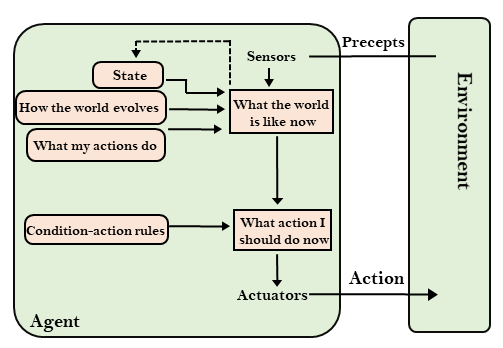

#Model Based Agent Code Example #1 (Vacuum Cleaner)

In [ ]:
# l=[7,8]
# l.
# d={'ke':9}
# d.key

In [ ]:
class ModelBasedAgent:
    def __init__(self):
        self.model = {} #current : dirty / clean

    def update_model(self, percept):
        self.model['current'] = percept
        print(self.model)


    def predict_action(self):
        if self.model['current'] == 'Dirty':
            return 'Clean the room'
        else:
            return 'Room is clean'

    def act(self, percept):
        self.update_model(percept)
        return self.predict_action()


class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}")
        if percept == 'Dirty':
            environment.clean_room()


# Create instances of agent and environment
agent = ModelBasedAgent()
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


{'current': 'Dirty'}
Step 1: Percept - Dirty, Action - Clean the room
{'current': 'Clean'}
Step 2: Percept - Clean, Action - Room is clean
{'current': 'Clean'}
Step 3: Percept - Clean, Action - Room is clean
{'current': 'Clean'}
Step 4: Percept - Clean, Action - Room is clean
{'current': 'Clean'}
Step 5: Percept - Clean, Action - Room is clean


#3.2.2 Model Based Agent Code Example #2 (Closing Window When it Starts to Rain)

In [ ]:
class Environment:
    def __init__(self, rain='No', windows_open='Open'):
        self.rain = rain
        self.windows_open = windows_open

    def get_percept(self):
        """Returns the current percept (rain status and window status)."""
        return {'rain': self.rain, 'windows_open': self.windows_open}

    def close_windows(self):
        """Closes the windows if they are open."""
        if self.windows_open == 'Open':
            self.windows_open = 'Closed'


class ModelBasedAgent:
    def __init__(self):
        self.model = {'rain': 'No', 'windows_open': 'Open'}

    def act(self, percept):
        """Decides action based on the model and current percept."""
        # Update the model with the current percept
        self.model.update(percept)

        # Check the model to decide action
        if self.model['rain'] == 'Yes' and self.model['windows_open'] == 'Open':
            return 'Close the windows'
        else:
            return 'No action needed'

def run_agent(agent, environment, steps):
    for step in range(steps):
        # Get the current percept from the environment
        percept = environment.get_percept()

        # Agent makes a decision based on the current percept
        action = agent.act(percept)

        # Print the current percept and the agent's action
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}")

        # If the agent decided to close the windows, update the environment
        if action == 'Close the windows':
            environment.close_windows()

# Create instances of agent and environment
agent = ModelBasedAgent()
environment = Environment(rain='Yes', windows_open='Open')  # It's raining and windows are open

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


Step 1: Percept - {'rain': 'Yes', 'windows_open': 'Open'}, Action - Close the windows
Step 2: Percept - {'rain': 'Yes', 'windows_open': 'Closed'}, Action - No action needed
Step 3: Percept - {'rain': 'Yes', 'windows_open': 'Closed'}, Action - No action needed
Step 4: Percept - {'rain': 'Yes', 'windows_open': 'Closed'}, Action - No action needed
Step 5: Percept - {'rain': 'Yes', 'windows_open': 'Closed'}, Action - No action needed


#**Goal Based Reflex Agent**

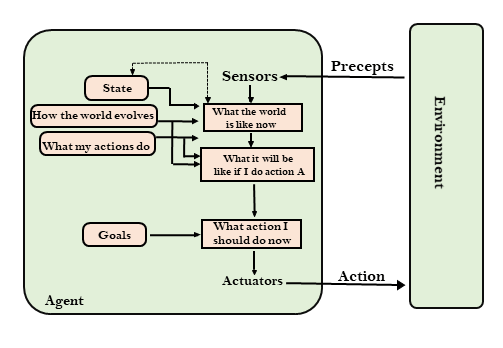

In [ ]:
class GoalBasedAgent:
    def __init__(self):
        self.goal = 'Clean'

    def formulate_goal(self, percept):
        if percept == 'Dirty':
            self.goal = 'Clean'
        else:
            self.goal = 'No action needed'

    def act(self, percept):
        self.formulate_goal(percept)
        if self.goal == 'Clean':
            return 'Clean the room'
        else:
            return 'Room is clean'


class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}")
        if percept == 'Dirty':
            environment.clean_room()


# Create instances of agent and environment
agent = GoalBasedAgent()
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


#**Utility Based Agent**

#3.4.2 Vaccumm Cleaner

In [ ]:
class UtilityBasedAgent:
    def __init__(self):
        self.utility = {'Dirty': -10, 'Clean': 10}

    def calculate_utility(self, percept):
        return self.utility[percept]

    def select_action(self, percept):
        if percept == 'Dirty':
            return 'Clean the room'
        else:
            return 'No action needed'

    def act(self, percept):
        action = self.select_action(percept)
        return action


class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'


def run_agent(agent, environment, steps):
    total_utility = 0
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        utility = agent.calculate_utility(percept)
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}, Utility - {utility}")
        total_utility += utility
        if percept == 'Dirty':
            environment.clean_room()
    print("Total Utility:", total_utility)


# Create instances of agent and environment
agent = UtilityBasedAgent()
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


Step 1: Percept - Dirty, Action - Clean the room, Utility - -10
Step 2: Percept - Clean, Action - No action needed, Utility - 10
Step 3: Percept - Clean, Action - No action needed, Utility - 10
Step 4: Percept - Clean, Action - No action needed, Utility - 10
Step 5: Percept - Clean, Action - No action needed, Utility - 10
Total Utility: 30


#3.4.2 Utility Based Agent Code Example # 2 (Choosing a Movie to Watch)

In [ ]:

class Environment:
    def __init__(self, movies=None):
        if movies is None:
            movies = {'Movie A': 8, 'Movie B': 6, 'Movie C': 9}
        self.movies = movies

    def get_percept(self):
        """Returns the list of movies and their review scores."""
        return self.movies


class UtilityBasedAgent:
    def __init__(self, mood_factor=0.7):
        self.mood_factor = mood_factor

    def utility(self, review):
        """Compute utility based on review score and mood factor."""
        return review * self.mood_factor

    def act(self, percept):
        """Decides which movie to watch based on utility."""
        best_movie = None
        best_utility = -float('inf')

        for movie, review in percept.items():
            movie_utility = self.utility(review)
            if movie_utility > best_utility:
                best_movie = movie
                best_utility = movie_utility

        return best_movie

def run_agent(agent, environment):
    percept = environment.get_percept()
    best_choice = agent.act(percept)
    print(f"Available Movies: {percept}")
    print(f"Best Movie to Watch: {best_choice}")


# Create instances of agent and environment
agent = UtilityBasedAgent(mood_factor=0.8)
environment = Environment({'Movie A': 7, 'Movie B': 9, 'Movie C': 5})

# Run the agent in the environment
run_agent(agent, environment)


Available Movies: {'Movie A': 7, 'Movie B': 9, 'Movie C': 5}
Best Movie to Watch: Movie B


#**Learning Agent**

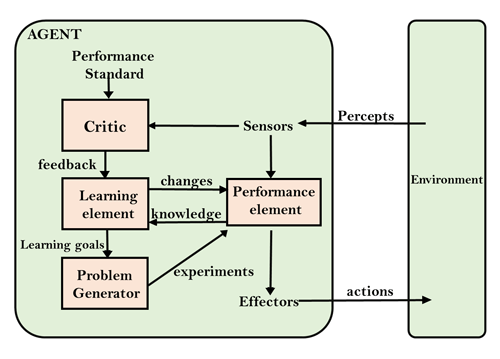

In [ ]:
import random

class LearningBasedAgent:
    def __init__(self, actions):
        self.Q = {}
        self.actions = actions
        self.alpha = 0.1  # Learning rate
        self.gamma = 0.9  # Discount factor
        self.epsilon = 0.1  # Exploration rate

    def get_Q_value(self, state, action):
        return self.Q.get((state, action), 0.0)

    def select_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.actions)
        else:
            return max(self.actions, key=lambda a: self.get_Q_value(state, a))

    def learn(self, state, action, reward, next_state):
        old_Q = self.get_Q_value(state, action)
        best_future_Q = max([self.get_Q_value(next_state, a) for a in self.actions])
        self.Q[(state, action)] = old_Q + self.alpha * (reward + self.gamma * best_future_Q - old_Q)

    def act(self, state):
        action = self.select_action(state)
        return action

class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'
        return 10

    def no_action_reward(self):
        return 0

def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        if percept == 'Dirty':
            reward = environment.clean_room()
            print(f"Step {step + 1}: Percept - {percept}, Action - {action}, Reward - {reward}")
        else:
            reward = environment.no_action_reward()
            print(f"Step {step + 1}: Percept - {percept}, Action - {action}, Reward - {reward}")
        next_percept = environment.get_percept()
        agent.learn(percept, action, reward, next_percept)


# Create instances of agent and environment
agent = LearningBasedAgent(['Clean the room', 'No action needed'])
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)
